## Differential cross section for $e^+ e^- \rightarrow \mu^+ \mu^-$ 

### Introduction

The goal of this tutorial is to compute the differential cross section for the process $e^+ e^- \rightarrow \mu^+ \mu^-$ using __helicity amplitudes__. 

In the
__Dirac representation__ of the gamma matrices, the free particle solutions of the Dirac equation (1928)

\begin{align}
    (i \gamma^\mu \partial_\mu - m) \psi = 0,\quad
    \gamma^\mu \gamma^\nu + \gamma^\nu \gamma^\mu = 2 g^{\mu\nu},
\end{align}
are
\begin{align}
    u_r(p) & = \sqrt{E + m} \begin{pmatrix} \phi_r \\ \frac{\mathbf{\sigma} \cdot \mathbf{p}}{E + m} \phi_r \end{pmatrix},\\
  v_r(p) & = \sqrt{E + m} \begin{pmatrix} \frac{\mathbf{\sigma} \cdot \mathbf{p}}{E + m} \chi_r \\ \chi_r \end{pmatrix},
\end{align}
for particles and antiparticles, respectively;  $\sigma$ are the $2\times 2$ Pauli matrices.
The 2-component spinors are chosen to be
\begin{align}
    \phi_1 & = \chi_2 = \begin{pmatrix} 1 \\ 0 \end{pmatrix},\\
    \phi_2 & = \chi_1 = \begin{pmatrix} 0 \\ 1 \end{pmatrix},
\end{align}


__Tips__: 
  * Use __esc r__ to disable a cell
  * Use __esc y__ to reactivate it
  * Use __esc m__ to go to markdown mode
  * Shift + return to execute a cell

In [1]:
# load symbolic algebra module
import sympy as sm
import sympy.functions.special.tensor_functions as t
from sympy.matrices import Matrix

# gamma matrices and sigma (Pauli) matrices
from sympy.physics.matrices import mgamma, msigma

# complex number 0 + I and simplifiers
from sympy import I, trigsimp, radsimp

# symbolic solver
from sympy.solvers import solve

# enable pretty printing of symbolic equations
from IPython.display import display
#sm.init_printing(use_latex='mathjax')
sm.init_printing()


levi = t.LeviCivita
kron = t.KroneckerDelta

### Define Standard Matrices

$\gamma^0, \gamma^1, \gamma^2, \gamma^3$ and Pauli matrices $\sigma_i$.

$\gamma^5 = i \gamma^0 \gamma^1 \gamma^2 \gamma^3$

$P_L = (1 - \gamma^5)/2$

$P_R = (1 + \gamma^5)/2$

Note: $\gamma^5 \gamma^5 = 1$.

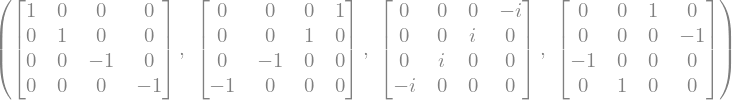

In [2]:
G0  = mgamma(0)
G1  = mgamma(1)
G2  = mgamma(2)
G3  = mgamma(3)
G5  = mgamma(5)

ONE = G5*G5

PL  = (ONE - G5)/2
PR  = (ONE + G5)/2

sigma1 = msigma(1)
sigma2 = msigma(2)
sigma3 = msigma(3)

G0,G1,G2,G3

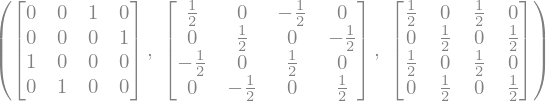

In [3]:
G5, PL, PR

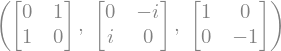

In [4]:
sigma1, sigma2, sigma3

### Define symbols

Some symbols are defined to be non-commutative simply to preserve their order in expressions! We define symbolic versions of the above matrices or $2\times 2$ versions of them where it is understood that terms such as $1$ or $0$ are really $2\times 2$ matrices.

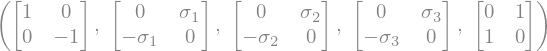

In [5]:
p    = sm.Symbol('p',   commutative=True)
px   = sm.Symbol('p_x', commutative=True)
py   = sm.Symbol('p_y', commutative=True)
pz   = sm.Symbol('p_z', commutative=True)
m    = sm.Symbol('m',   commutative=True)
E    = sm.Symbol('E',   commutative=True)

A    = sm.Symbol('A', commutative=False)
B    = sm.Symbol('B', commutative=False)

sp   = sm.Symbol('\sigma\cdot p', commutative=False)
sigma= sm.Symbol('\sigma',   commutative=False)
sigm1= sm.Symbol('\sigma_1', commutative=False)
sigm2= sm.Symbol('\sigma_2', commutative=False)
sigm3= sm.Symbol('\sigma_3', commutative=False)

phi  = sm.Symbol('\phi', commutative=False)
phi_dagger= sm.Symbol('\phi^\dagger', commutative=False)

chi  = sm.Symbol('\chi', commutative=False)
chi_dagger= sm.Symbol('\chi^\dagger', commutative=False)

phi_1       = sm.Symbol('\phi_1', commutative=False)
phi_1_dagger= sm.Symbol('\phi_1^\dagger', commutative=False)
phi_2       = sm.Symbol('\phi_2', commutative=False)
phi_2_dagger= sm.Symbol('\phi_2^\dagger', commutative=False)

chi_1       = sm.Symbol('\chi_1', commutative=False)
chi_1_dagger= sm.Symbol('\chi_1^\dagger', commutative=False)
chi_2       = sm.Symbol('\chi_2', commutative=False)
chi_2_dagger= sm.Symbol('\chi_2^\dagger', commutative=False)

g0 = Matrix([[1, 0], [0,-1]])
g1 = Matrix([[0, sigm1],[-sigm1, 0]])
g2 = Matrix([[0, sigm2],[-sigm2, 0]])
g3 = Matrix([[0, sigm3],[-sigm3, 0]])
g5 = Matrix([[0, 1], [1,0]])

U    = sm.sqrt(E + m)*Matrix([phi, sp/(E+m)*phi])
V    = sm.sqrt(E + m)*Matrix([sp/(E+m)*chi, chi])

AB   = Matrix([A, B])

one  = Matrix([[1, 0], [0, 1]])

Phi_1= Matrix([[1], [0]])
Phi_2= Matrix([[0], [1]])

Chi_1= Matrix([[0], [1]])
Chi_2= Matrix([[1], [0]])

pL   = (one - sigma1)/2
pR   = (one + sigma1)/2

g0, g1, g2, g3, g5

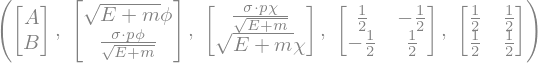

In [6]:
AB, U, V, pL, pR

### Define $\sigma\cdot\mathbf{p}$ and $\sigma\cdot\mathbf{\hat{p}}$

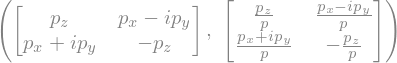

In [7]:
sigmap = px*sigma1 + py*sigma2 + pz*sigma3
sigmaphat = sigmap / p
sigmap, sigmaphat

### Left- and right-handed projection operators and chirality operator 
Compute the effect of the left and right-handed projection operators, $P_L = (1 - \gamma^5)/2$ and $P_R = (1 + \gamma^5)/2$, respectively, on the spinor $$u = \begin{pmatrix} A \\ B \end{pmatrix}.$$ Also verify that they are indeed eigen-spinors of the chirality (that is, handedness) operator $\gamma^5$; that is, verify

\begin{align}
    u_L & = P_L u, \quad \gamma^5 u_L = -u_L, \\
    u_R & = P_R u, \quad \gamma^5 u_R = +u_R.
\end{align}

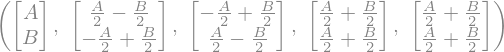

In [8]:
UL = pL*AB
UR = pR*AB
AB, UL, g5*UL, UR, g5*UR

Verify
\begin{align}
    P_L^2 & = P_L,\\
    P_R^2 & = P_R,\\
    P_L P_R & = 0.
\end{align}

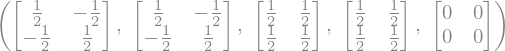

In [9]:
pL*pL, pL, pR*pR, pR, pL*pR

## Decomposition of Dirac spinors

### Decomposition into left and right chiral components
Consider the spinors
\begin{align}
    u_r(p) & = \sqrt{E + m} \begin{pmatrix} \phi_r \\ \frac{\mathbf{\sigma} \cdot \mathbf{p}}{E + m} \phi_r \end{pmatrix},\\
  v_r(p) & = \sqrt{E + m} \begin{pmatrix} \frac{\mathbf{\sigma} \cdot \mathbf{p}}{E + m} \chi_r \\ \chi_r \end{pmatrix},
\end{align}
for particles and antiparticles, respectively. Given a spinor

\begin{align}
\left[\begin{matrix}A\\B\end{matrix}\right],
\end{align}
its left and right-handed components are given by (see above)

\begin{align}
\frac{1}{2}\left[\begin{matrix} A - B \\- A + B\end{matrix}\right] &\text{ and }
\frac{1}{2}\left[\begin{matrix} A + B \\  A + B\end{matrix}\right],
\end{align}

respectively.

Applying these results to $u$ yields the quantities, 

\begin{align}
u_L & = \frac{\sqrt{E+m}}{2}\begin{pmatrix} +(1 - \frac{\sigma \cdot \mathbf{p}}{E+m} )\phi_r \\ -(1 - \frac{\sigma \cdot \mathbf{p}}{E+m}) \phi_r \end{pmatrix}, \quad
u_R  = \frac{\sqrt{E+m}}{2}\begin{pmatrix} +(1 + \frac{\sigma \cdot \mathbf{p}}{E+m} )\phi_r \\ +(1 + \frac{\sigma \cdot \mathbf{p}}{E+m}) \phi_r \end{pmatrix} ,
\end{align}

that is,  left and right chiral components of the Dirac spinor $u$. 

### Decomposition into left and right helicity components

Each chiral component can be decomposed into helicity states. Define 

\begin{align}
P_\pm & = \frac{1}{2} \left(1 \pm \frac{\sigma\cdot\mathbf{p}}{p}\right),\\
      & = \frac{1}{2} \left(1 \pm \sigma\cdot\mathbf{\hat{p}}\right),
\end{align}
which, noting that $(\sigma\cdot\mathbf{\hat{p}})^2=1$, satisfy the relations

\begin{align}
    P_+ + P_- & = 1, \quad P_+ P_- = 0, \quad P_\pm^2 = P_\pm, \\
    P_+ - P_- & = \sigma\cdot\mathbf{\hat{p}}, \\
    \sigma\cdot\mathbf{\hat{p}} P_\pm & = \pm P_\pm.
\end{align}

Using the identity
\begin{align}
1 \pm a A & = \frac{(1-a)}{2} (1 \mp A) + \frac{(1+a)}{2}(1 \pm A),
\end{align}
we can decompose the left and right chiral spinors into their helicity components as follows,

\begin{align}
 u_L & = (1 - a) \frac{\sqrt{E+m}}{2}\begin{pmatrix} +P_+ \phi \\ -P_+ \phi \end{pmatrix} + (1 + a) \frac{\sqrt{E+m}}{2} \begin{pmatrix} +P_- \phi \\ -P_- \phi \end{pmatrix},\\
u_R & = (1 - a) \frac{\sqrt{E+m}}{2} \begin{pmatrix} +P_- \phi \\ + P_- \phi \end{pmatrix} + (1 + a) \frac{\sqrt{E+m}}{2} \begin{pmatrix} +P_+ \phi \\ +P_+ \phi \end{pmatrix},
\end{align}
where $$a = \frac{p}{E + m} = \frac{\beta}{1 + \gamma^{-1}}, \quad\gamma=1 / \sqrt{1 - \beta^2}.$$ This makes is clear that chirality, that is, handedness, is different from helicity. However,
in the ultra-relativistic limit $a \rightarrow 1$. Therefore, for both $u_L$ and $u_R$ the first terms vanish. By applying the helicity operator $\sigma\cdot\mathbf{\hat{p}}$ to these terms, we see that the left chirality state $u_L$ becomes identical to a left helicity state, while $u_R$ becomes indistinguishable from a right helicity state.


We can also decompose the spinor $u$ into positive ($u_\uparrow$) and negative ($u_\downarrow$) helicity spinors:

\begin{align}
u & = \sqrt{E+m}\begin{pmatrix} P_+ \phi \\ a P_+ \phi \end{pmatrix} + 
\sqrt{E+m}\begin{pmatrix} P_- \phi \\ -a P_- \phi \end{pmatrix}.
\end{align}


### $v_L$ and $v_R$ spinor helicity decomposition

The helicity operator for an antiparticle is taken to be the negative of that of a particle. Consequently, when the operator is applied to a right helicity state, one obtains a negative eigenvalue. Likewise, when the operator is applied to a left helicity state one obtains a positive eigenvalue. 

Following a similar procedure for $v$ as followed for the spinor $u$ leads to the helicity decomposition

\begin{align}
v & = \sqrt{E+m}\begin{pmatrix} a P_+ \chi \\ P_+ \chi \end{pmatrix} + 
\sqrt{E+m}\begin{pmatrix} -a P_- \chi \\ P_- \chi \end{pmatrix},
\end{align}
where the first term is the negative helicity spinor $v_\downarrow$ and the second term is the positive helicity spinor $v_\uparrow$.

### 2-component helicity spinors in Cartesian coordinates
For $P_\pm \phi$, we are free to use either $\phi_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $\phi_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. 

### Define Dirac helicity spinors
We'll follow the usual convention and choose 
\begin{align}
    u_{\uparrow 1}   & = P_+ \phi_1,\\
    u_{\downarrow 1} & = P_- \phi_1.
\end{align}
Then we can write
\begin{align}
& \textbf{particles} \nonumber\\
u_{\uparrow} & = \sqrt{E+m} \begin{pmatrix} u_{\uparrow 1} \\ a u_{\uparrow 1} \end{pmatrix},\quad
u_{\downarrow} = \sqrt{E+m} \begin{pmatrix} u_{\downarrow 1} \\ -a u_{\downarrow 1} \end{pmatrix},
\end{align}

\begin{align}
& \textbf{antiparticles} \nonumber\\
v_{\downarrow} & = \sqrt{E+m} \begin{pmatrix} a u_{\uparrow 1} \\ u_{\uparrow 1} \end{pmatrix},\quad
v_{\uparrow} = \sqrt{E+m} \begin{pmatrix} -a u_{\downarrow 1} \\ u_{\downarrow 1} \end{pmatrix},
\end{align}

where the spinors have been normalized to $2E$.


Check $(\sigma\cdot\mathbf{\hat{p}})^2=1$

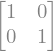

In [10]:
sigmaphat2 = sigmaphat**2
sigmaphat2.simplify()
sigmaphat2 = sigmaphat2.subs({px**2+py**2+pz**2: p**2})
sigmaphat2

Define,
\begin{align}
    P_+ & = \frac{1}{2}(1 + \sigma\cdot\mathbf{\hat{p}}),\\
    P_- & = \frac{1}{2}(1 - \sigma\cdot\mathbf{\hat{p}}),\\
    u_{\uparrow 1} & = P_+ \phi_1, \\
    u_{\uparrow 2} & = P_+ \phi_2, \\
    u_{\downarrow 1} & = P_- \phi_1, \\
    u_{\downarrow 2} & = P_- \phi_2 ,
\end{align}
in Cartesian coordinates.

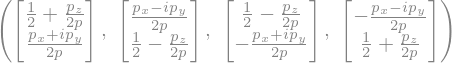

In [11]:
pplus = (one + sigmaphat)/2
pminus= (one - sigmaphat)/2

up1   = pplus  * Phi_1
up2   = pplus  * Phi_2

ud1   = pminus * Phi_1
ud2   = pminus * Phi_2

up1, up2, ud1, ud2

### 2-component helicity spinors in spherical polar coordinates

Define some substitution maps.

In [12]:
theta, fi = sm.symbols('\\theta, \phi', real=True)

subp      = {px**2+py**2+pz**2:p**2}

# to polar coordinates
subpolar  = {px:p*sm.sin(theta)*sm.cos(fi), 
             py:p*sm.sin(theta)*sm.sin(fi), 
             pz:p*sm.cos(theta)}

# to half-angles
subhangle = {sm.sin(theta): 2*sm.sin(theta/2)*sm.cos(theta/2),
             sm.cos(theta): 2*sm.cos(theta/2)**2 - 1}

# cos(phi) + i*sin(phi) => exp(i*phi)
subc   = {I*sm.sin(fi) + sm.cos(fi): sm.exp(I*fi)}

# cos(phi) - i*sin(phi) => exp(-i*phi)
subcc  = {-I*sm.sin(fi) + sm.cos(fi): sm.exp(-I*fi)}

# get rid of absolute values
subrmabs = {sm.Abs(sm.sin(theta/2)): sm.sin(theta/2), 
            sm.Abs(sm.cos(theta/2)): sm.cos(theta/2)}

  1. Compute $u^\dagger u$. (Note: the conjugate method causes problems)
  1. Convert to spinors to spherical polar coordinates

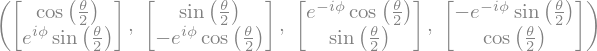

In [13]:
def norm(u):
    uT    = u.transpose()
    uT[0] = uT[0].subs({I: -I})   # Conjugate by hand: I => -I
    uT[1] = uT[1].subs({I: -I})
    return sm.trigsimp((uT*u)[0]) # trigonometric simplifications

def to_polar(u):
    
    # convert to polar coordinates
    u_s    = u.subs(subpolar)

    # 1. convert to half-angles 
    # 2. convert cos(phi) + i*sin(phi) to exp(i*phi) form etc.
    # 3. do some trig simplification
    u_s[0] = sm.trigsimp(u_s[0].subs(subhangle)).subs(subc).subs(subcc)
    u_s[1] = sm.trigsimp(u_s[1].subs(subhangle)).subs(subc).subs(subcc)
    
    # normalize spinor
    N      = sm.sqrt(norm(u_s)).factor(sm.sqrt(2))
    u_s    = u_s / N
    
    # back to half-angles and simplify!
    u_s[0] = sm.trigsimp(u_s[0]).subs(subhangle).simplify()
    u_s[1] = sm.trigsimp(u_s[1]).subs(subhangle).simplify()
    
    # get rid of absolute value
    u_s[0] = u_s[0].subs(subrmabs).trigsimp()
    u_s[1] = u_s[1].subs(subrmabs).trigsimp()
    return u_s

def simplify_spinor(u):
    for i in range(2):
        u[i] = u[i].subs(subhangle).expand()
        u[i] = u[i].trigsimp()

# convert spinors to polar coordinates
up1_s = to_polar(up1)
ud1_s = to_polar(ud1)

up2_s = to_polar(up2)
ud2_s = to_polar(ud2)

simplify_spinor(up1_s)
simplify_spinor(ud1_s)
simplify_spinor(up2_s)
simplify_spinor(ud2_s)

# verify that we get the conventional form of the helicity spinors
up1_s, ud1_s, up2_s, ud2_s

Convert $\sigma\cdot\mathbf{\hat{p}}$ to polar coordinates.

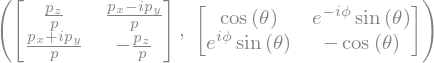

In [14]:
sigma_p    = sigmaphat.subs(subpolar)
sigma_p[0] = sigma_p[0].simplify()
sigma_p[1] = sigma_p[1].simplify()
sigma_p[2] = sigma_p[2].simplify()
sigmaphat, sigma_p

Verify that $u_{\uparrow 1}$, $u_{\uparrow 2}$ and indeed eigen-spinors of $\sigma\cdot\mathbf{\hat{p}}$ with eigenvalue $+1$, while $u_{\downarrow 1}$, $u_{\downarrow 2}$ have eigenvalue $-1$.

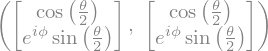

In [15]:
y = sigma_p * up1_s
simplify_spinor(y)
up1_s, y

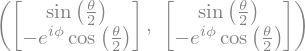

In [16]:
y = sigma_p * ud1_s
simplify_spinor(y)
ud1_s, -y

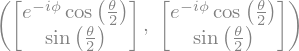

In [17]:
y = sigma_p * up2_s
simplify_spinor(y)
up2_s, y

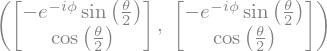

In [18]:
y    = sigma_p * ud2_s
simplify_spinor(y)
ud2_s, -y

Choose which 2-component spinors to use

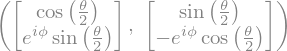

In [19]:
phi_up = up1_s
phi_dn = ud1_s
phi_up, phi_dn

Define 

$
\begin{align}
s & = (p_1 + p_2)^2,\\
N & = \sqrt{E + m}, \\ 
  & = \sqrt{E} \sqrt{1 + \sqrt{1 - \beta^2}}, \\
a & = \frac{p}{E + m},\\ 
  & = \frac{\beta} {1 + \sqrt{1 - \beta^2}}.
\end{align}
$

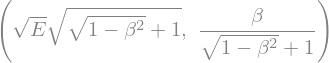

In [20]:
s, beta  = sm.symbols('s, \\beta')
a = beta/(1+sm.sqrt(1-beta**2))
N = sm.sqrt(E)*sm.sqrt(1 + sm.sqrt(1-beta**2))
N, a

Construct Dirac helicity spinors for particles. Yes, they look a tad ferocious!

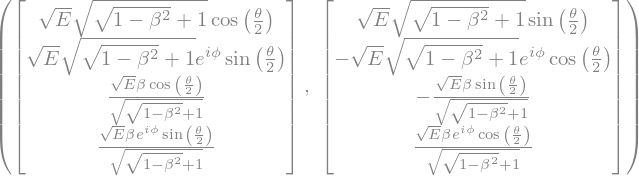

In [21]:
u_up = N*Matrix([[phi_up], [ a*phi_up]])
u_dn = N*Matrix([[phi_dn], [-a*phi_dn]])
u_up, u_dn

Construct Dirac helicity spinors for antiparticles

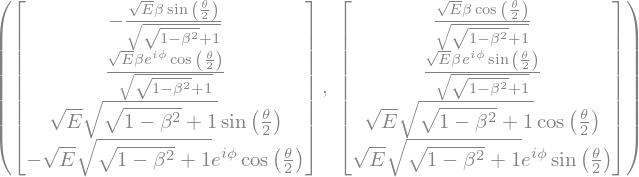

In [22]:
v_dn = N*Matrix([[ a*phi_up], [phi_up]])
v_up = N*Matrix([[-a*phi_dn], [phi_dn]])
v_up, v_dn

###  $e^+ e^- \rightarrow \mu^+ \mu^-$ cross section

The differential cross section (in the center of mass) for the process $1, 2 \rightarrow 3, 4$ is given by

$
\begin{align}
    \frac{d\sigma}{d\Omega} & = \frac{1}{64\pi^2 s}\frac{|\mathbf{p}_3|}{|\mathbf{p}_1|} \langle |M|^2 \rangle, \nonumber\\
    & = \frac{1}{64\pi^2 s} \langle |M|^2 \rangle .
\end{align}
$

The 4-momenta are
\begin{align}
    p_1 & = E(1, 0, 0, \beta_1), \tag{$e^-$}\\
    p_2 & = E(1, 0, 0,-\beta_1), \tag{$e^+$}\\
    p_3 & = E(1, \beta_3 \sin\theta, 0, \beta_3 \cos\theta), \tag{$\mu^-$}\\
    p_4 & = E(1,-\beta_3 \sin\theta, 0,-\beta_3 \cos\theta), \tag{$\mu^+$}
\end{align}

Without loss of generality, we can take $\phi = 0$.

### Matrix elements
Note: $e^2 = 4\pi \alpha$. We need to compute matrix elements of the form 

\begin{align}
    M & = \frac{4\pi\alpha}{s} [\overline{v}(p_2) \gamma^\mu u(p_1)]
    [\overline{u}(p_3) \gamma_\mu v(p_4)].
\end{align}

There are 4 helicity state combinations in the initial state and 4 in the final state. Therefore, in general, there are 16 non-interfering processes that need to be considered and we need a matrix element, that is, an amplitude, for each. 

We now insert the specific 4-momenta into the helicity spinors. 

In [23]:
beta1, beta3 = sm.symbols('\\beta_1, \\beta_3')
def subs_spinor(u, Beta, Fi, Theta=None):
    u_s = u.subs({beta: Beta, fi: Fi})
    if Theta == None: return u_s
    if Theta in [0, sm.pi, -sm.pi]:
        for i in range(4):
            u_s[i] = sm.limit(u_s[i], theta, Theta)
    else:
        u_s = u_s.subs({theta: Theta})
    return u_s

$e^-$

$
\begin{align}
    p_1 & = E(1, 0, 0, \beta_1)
\end{align}
$

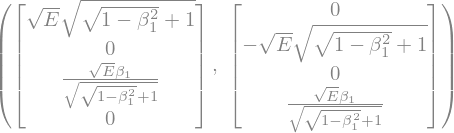

In [24]:
u_up_1 = subs_spinor(u_up, Beta=beta1, Fi=0, Theta=0)
u_dn_1 = subs_spinor(u_dn, Beta=beta1, Fi=0, Theta=0)
u_up_1, u_dn_1

$e^+$

$
\begin{align}
    p_2 & = E(1, 0, 0,-\beta_1)
\end{align}
$

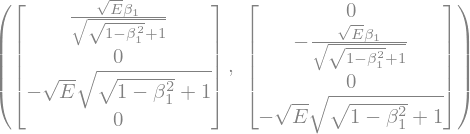

In [25]:
v_up_2 = subs_spinor(v_up, Beta=beta1, Fi=0, Theta=-sm.pi)
v_dn_2 = subs_spinor(v_dn, Beta=beta1, Fi=0, Theta=-sm.pi)
v_up_2, v_dn_2

$\mu^-$

$
\begin{align}
    p_3 & = E(1, \beta_3 \sin\theta, 0, \beta_3 \cos\theta)
\end{align}
$

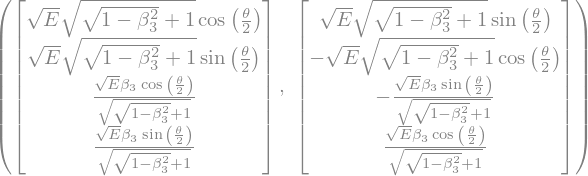

In [26]:
u_up_3 = subs_spinor(u_up, Beta=beta3, Fi=0)
u_dn_3 = subs_spinor(u_dn, Beta=beta3, Fi=0)
u_up_3, u_dn_3

$\mu^+$

$
\begin{align}
    p_4 & = E(1,-\beta_3 \sin\theta, 0,-\beta_3 \cos\theta)
\end{align}
$

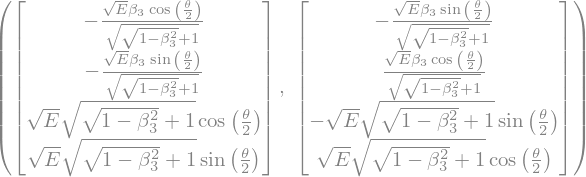

In [27]:
v_up_4 = subs_spinor(v_up, Beta=beta3, Fi=0, Theta=theta+sm.pi)
v_dn_4 = subs_spinor(v_dn, Beta=beta3, Fi=0, Theta=theta+sm.pi)
v_up_4, v_dn_4

Compute amplitude $a^\mu_{ij} = \overline{u}_i \gamma^\mu u_j$

In [28]:
def amplitude(u1, u2):
    # compute Dirac conjugate
    u1T= u1.transpose().subs({I: -I})*G0
    
    y0 = sm.trigsimp((u1T*G0*u2)[0].expand()).simplify()
    y1 = sm.trigsimp((u1T*G1*u2)[0].expand()).simplify()
    y2 = sm.trigsimp((u1T*G2*u2)[0].expand()).simplify()
    y3 = sm.trigsimp((u1T*G3*u2)[0].expand()).simplify()
    
    return Matrix([y0,y1,y2,y3])

In [29]:
v2 = [v_up_2, v_dn_2]
u1 = [u_up_1, u_dn_1]

u3 = [u_up_3, u_dn_3]
v4 = [v_up_4, v_dn_4]

electron currents
up(2) * gamma^mu * up(1)


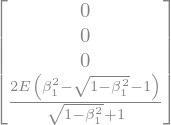

------------------------------------------------------------
up(2) * gamma^mu * dn(1)


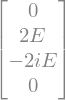

------------------------------------------------------------
dn(2) * gamma^mu * up(1)


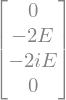

------------------------------------------------------------
dn(2) * gamma^mu * dn(1)


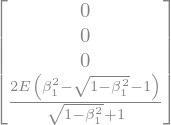

------------------------------------------------------------

muon currents
up(3) * gamma_mu * up(4)


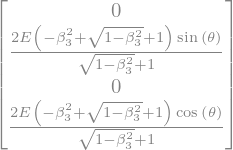

------------------------------------------------------------
up(3) * gamma_mu * dn(4)


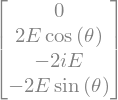

------------------------------------------------------------
dn(3) * gamma_mu * up(4)


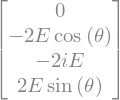

------------------------------------------------------------
dn(3) * gamma_mu * dn(4)


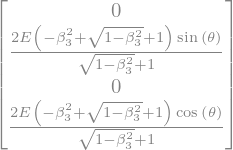

------------------------------------------------------------


In [30]:
print('electron currents')
Je     = []
Jelabel= []
label  = ['up', 'dn']
for i, v in enumerate(v2):
    for j, u in enumerate(u1):
        Jelabel.append('%s(2) * gamma^mu * %s(1)' % (label[i], label[j]))
        Je.append( amplitude(v, u) )
        print('%s' % Jelabel[-1])
        display(Je[-1])
        print('-'*60)
        
print('\nmuon currents')
Jm     = []
Jmlabel= []
for i, u in enumerate(u3):
    for j, v in enumerate(v4):
        Jmlabel.append('%s(3) * gamma_mu * %s(4)' % (label[i], label[j]))
        Jm.append( amplitude(u, v) )
        print('%s' % Jmlabel[-1])
        display(Jm[-1])
        #print('%s %s\n' % (Jmlabel[-1], Jm[-1]))
        print('-'*60)

Compute the 16 matrix elements of the form 
\begin{align}
    M & = \frac{4\pi\alpha}{s} [\overline{v}(p_2) \gamma^\mu u(p_1)]
    [\overline{u}(p_3) \gamma_\mu v(p_4)],
\end{align}
from the above currents.

Matrix Elements
    1 up(2) * gamma^mu * up(1) * up(3) * gamma_mu * up(4)


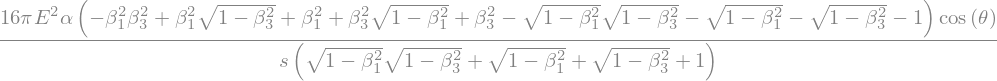

------------------------------------------------------------
    2 up(2) * gamma^mu * up(1) * up(3) * gamma_mu * dn(4)


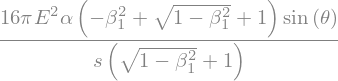

------------------------------------------------------------
    3 up(2) * gamma^mu * up(1) * dn(3) * gamma_mu * up(4)


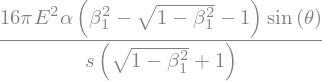

------------------------------------------------------------
    4 up(2) * gamma^mu * up(1) * dn(3) * gamma_mu * dn(4)


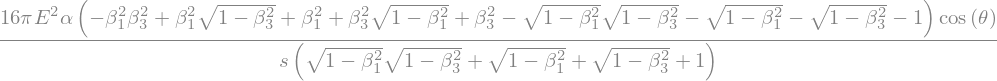

------------------------------------------------------------
    5 up(2) * gamma^mu * dn(1) * up(3) * gamma_mu * up(4)


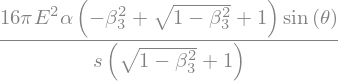

------------------------------------------------------------
    6 up(2) * gamma^mu * dn(1) * up(3) * gamma_mu * dn(4)


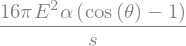

------------------------------------------------------------
    7 up(2) * gamma^mu * dn(1) * dn(3) * gamma_mu * up(4)


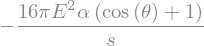

------------------------------------------------------------
    8 up(2) * gamma^mu * dn(1) * dn(3) * gamma_mu * dn(4)


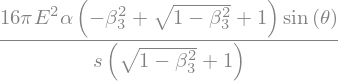

------------------------------------------------------------
    9 dn(2) * gamma^mu * up(1) * up(3) * gamma_mu * up(4)


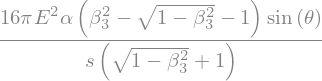

------------------------------------------------------------
   10 dn(2) * gamma^mu * up(1) * up(3) * gamma_mu * dn(4)


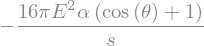

------------------------------------------------------------
   11 dn(2) * gamma^mu * up(1) * dn(3) * gamma_mu * up(4)


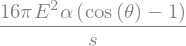

------------------------------------------------------------
   12 dn(2) * gamma^mu * up(1) * dn(3) * gamma_mu * dn(4)


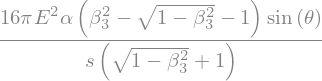

------------------------------------------------------------
   13 dn(2) * gamma^mu * dn(1) * up(3) * gamma_mu * up(4)


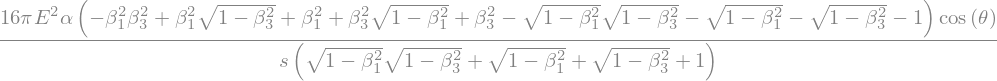

------------------------------------------------------------
   14 dn(2) * gamma^mu * dn(1) * up(3) * gamma_mu * dn(4)


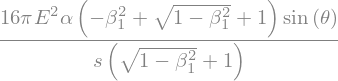

------------------------------------------------------------
   15 dn(2) * gamma^mu * dn(1) * dn(3) * gamma_mu * up(4)


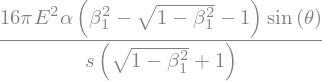

------------------------------------------------------------
   16 dn(2) * gamma^mu * dn(1) * dn(3) * gamma_mu * dn(4)


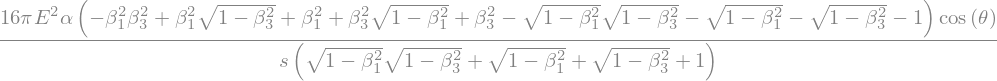

------------------------------------------------------------


In [31]:
alpha = sm.symbols('\\alpha')

print('Matrix Elements')
M = []
L = []
n = 0
for i, je in enumerate(Je):
    jeT = je.transpose()
    for j, jm in enumerate(Jm):
        n += 1
        y = (jeT * jm)[0]
        y = 4*sm.pi*alpha*y/s
        
        # do some symbolic simplification
        y = y.expand().simplify().trigsimp()
        
        M.append(y)
        label = Jelabel[i]+' * '+Jmlabel[j]
        L.append(label)
        print('%5d %s' % (n, label))
        display(y)
        print('-'*60)

Sum squared matrix elements 
$$\langle |M|^2 \rangle = \frac{1}{4} \sum_{j=1}^{16} M^*_j M_j$$
and average over the initial four helicity states.

In [32]:
MM = (sum([x.subs({I:-I})*x for x in M])).simplify()/4
MM = MM.subs({E: sm.sqrt(s)/2}).trigsimp()
MM

Finally, compute differential cross section. Amazingly, the messy algebra simplifies considerbly.

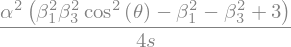

In [33]:
diff_xsec = MM/(64*sm.pi**2*s)
diff_xsec

### Relativistic limit

Cross section in relatvistic limit:
$$\frac{d\sigma}{d\Omega} = \frac{\alpha^2}{4s}[1 + \cos^2(\theta)].$$

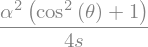

In [34]:
d_xsec = diff_xsec.subs({beta1:1, beta3:1})
d_xsec

Matrix elements in relativistic limit. In this limit, since helicity is conserved all non-helicity conserving amplitudes will be suppressed. 

Matrix Elements in Relativistic Limit
------------------------------------------------------------
    6 up(2) * gamma^mu * dn(1) * up(3) * gamma_mu * dn(4)


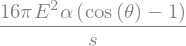

------------------------------------------------------------
    7 up(2) * gamma^mu * dn(1) * dn(3) * gamma_mu * up(4)


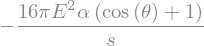

------------------------------------------------------------
   10 dn(2) * gamma^mu * up(1) * up(3) * gamma_mu * dn(4)


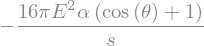

------------------------------------------------------------
   11 dn(2) * gamma^mu * up(1) * dn(3) * gamma_mu * up(4)


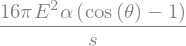

In [35]:
print('Matrix Elements in Relativistic Limit')

Ms = []
for i, (label, m) in enumerate(zip(L, M)):
    y = m.subs({beta1:1, beta3:1})
    if y.evalf() == 0: continue
    print('-'*60)
    print('%5d %s' % (i+1, label))
    display(y)
    Ms.append(y)

In [36]:
MM = (sum([x.subs({I:-I})*x for x in Ms])).simplify()/4
MM = MM.subs({E: sm.sqrt(s)/2})
MM

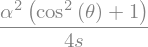

In [37]:
diff_xsec = MM/(64*sm.pi**2*s)
diff_xsec

### Some useful simplification functions

In [38]:
TR='''
TR0 - simplify expression
TR1 - sec-csc to cos-sin
TR2 - tan-cot to sin-cos ratio
TR2i - sin-cos ratio to tan
TR3 - angle canonicalization
TR4 - functions at special angles
TR5 - powers of sin to powers of cos
TR6 - powers of cos to powers of sin
TR7 - reduce cos power (increase angle)
TR8 - expand products of sin-cos to sums
TR9 - contract sums of sin-cos to products
TR10 - separate sin-cos arguments
TR10i - collect sin-cos arguments
TR11 - reduce double angles
TR12 - separate tan arguments
TR12i - collect tan arguments
TR13 - expand product of tan-cot
TRmorrie - prod(cos(x*2**i), (i, 0, k - 1)) -> sin(2**k*x)/(2**k*sin(x))
TR14 - factored powers of sin or cos to cos or sin power
TR15 - negative powers of sin to cot power
TR16 - negative powers of cos to tan power
TR22 - tan-cot powers to negative powers of sec-csc functions
TR111 - negative sin-cos-tan powers to csc-sec-cot
'''